# Scatter Plot

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

#load dataset
df = pd.read_csv('C:/Users/HP/Desktop/Python_Data_Project/datasets/data_jobs.csv')

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [29]:
df = df[df['job_title_short'] == 'Data Analyst']
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,NaN,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,NaN,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,NaN,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,NaN,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,NaN,NaN,NaN,Axelon Services Corporation,NaN,NaN
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,NaN,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,NaN,NaN,NaN,Amul,NaN,NaN
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}"


In [30]:
df_explode = df.explode('job_skills')

In [31]:
df_explode['job_skills'].value_counts

<bound method IndexOpsMixin.value_counts of 1                r
1           python
1              sql
1            nosql
1         power bi
            ...   
785717       azure
785737         sas
785737         sas
785737         sql
785737       excel
Name: job_skills, Length: 672513, dtype: object>

In [32]:
df_explode = df_explode.groupby('job_skills').agg( # use agg for multiple aggregation
    skill_count=('job_skills','count'), #skill_count it the column name, agg count for job_skills
    median_salary=('salary_year_avg', 'median') #skill_count it the column name, agg count for job_skills
).sort_values(by='skill_count', ascending=False).head(10) # sort_values in descending order with top 10 skills
df_explode



,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


In [34]:
top_10_skills = df_explode.index.to_list()
top_10_skills

['sql',
 'excel',
 'python',
 'tableau',
 'power bi',
 'r',
 'sas',
 'powerpoint',
 'word',
 'sap']

In [40]:
top_skill_count = df_explode['skill_count'].to_list()
top_skill_count

[92428, 66860, 57190, 46455, 39380, 29996, 27998, 13822, 13562, 11280]

In [55]:
top_median_salary = df_explode['median_salary'].to_list()
top_median_salary

[92500.0,
 84479.0,
 98500.0,
 95000.0,
 90000.0,
 92527.5,
 90000.0,
 85000.0,
 80000.0,
 90000.0]

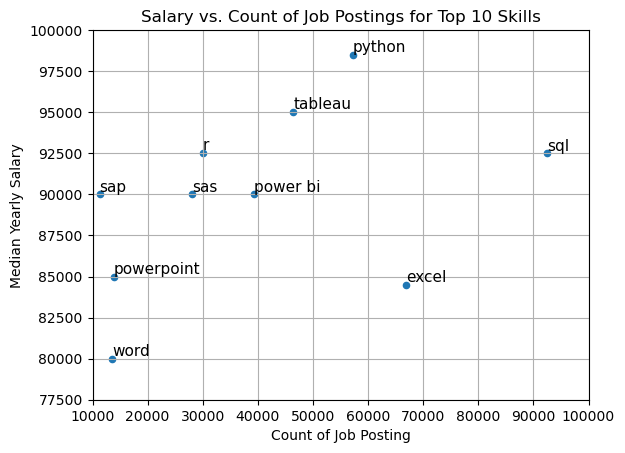

In [54]:
df_explode.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.ylabel('Median Yearly Salary')
plt.xlabel('Count of Job Posting')
plt.ylim(77500, 100000)
plt.xlim(10000, 100000)


for i in range(len(top_skill_count)):
    plt.text(top_skill_count[i], top_median_salary[i], top_10_skills[i], ha='left', va='bottom', fontsize=11)

plt.grid(True)

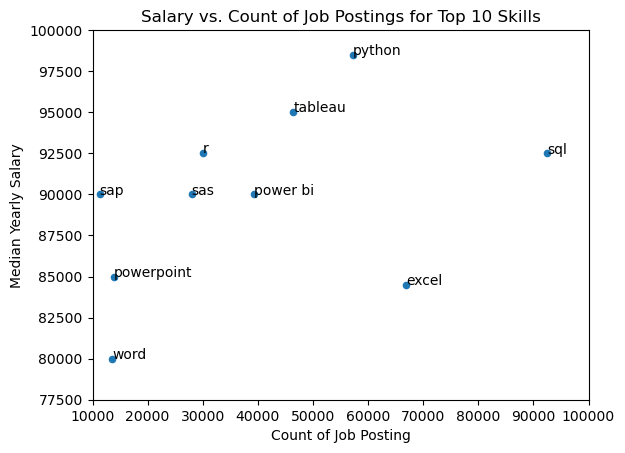

In [58]:
df_explode.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.ylabel('Median Yearly Salary')
plt.xlabel('Count of Job Posting')
plt.ylim(77500, 100000)
plt.xlim(10000, 100000)

for i, col in enumerate(df_explode.index):
    plt.text(df_explode['skill_count'].iloc[i], df_explode['median_salary'].iloc[i], df_explode.index[i])

plt.show()